# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Yuanita TriHastutik Rachmawati]
- **Email:** [yuanitatri987@gmail.com]
- **ID Dicoding:** [yuanita_9dre]

## Menentukan Pertanyaan Bisnis

1. Day Review : Dalam dua tahun terakhir, kapan terjadi lonjakan tertinggi dalam jumlah peminjaman sepeda harian, dan bagaimana pola peminjaman sepeda sepanjang hari pada saat lonjakan tersebut terjadi?
2. Year Review: Bagaimana cuaca (suhu dan curah hujan) serta status hari (kerja/libur) mempengaruhi jumlah peminjaman sepeda harian di tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [189]:
dt_day= pd.read_csv('data/day.csv') #untuk data peminjaman sepeda
dt_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Memuat data peminjaman sepeda berdasarkan parameter yang sudah disediakan. terdapat 730 data dan 16 kolom parameter

In [190]:
# Load data menurut jam
dt_hour= pd.read_csv('data/hour.csv') #untuk data peminjaman sepeda
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
Memuat data peminjaman sepeda berdasarkan setiap jam. terdapat 17378 row dan 17 kolom parameer.
1. instant: indeks peminjaman
2.dteday : tanggal peminjaman
3. season : musim (1,2,3)
4. yr : tahun (2011,2012)
5. mnth : bulan
7. holiday : hari libur (1), hari kerja (0)
8. weekday : hari kerja
9. workingday : hari kerja(1), hari libur (0)
10. weatherist : cuaca
11. temp : Suhu yang dinormalkan dalam Celcius. Nilainya diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)
12. atemp :
13. hum :  Kelembaban yang dinormalkan. Nilai dibagi menjadi 100 (maks)
14. windspeed: Kecepatan angin yang dinormalkan. Nilai dibagi menjadi 67 (maks)
15. casual: jumlah pengguna kasual
16. registered : jumlah pengguna terdaftar
17. count :jumlah pengguna keseluruhan

// Pada data hari memang tidak tidak ada kolom hr, karena rekap data sesuai harian.

### Assessing Data

In [191]:
dt_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [192]:
dt_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [193]:
print("Jumlah duplikasi: ",dt_day.duplicated().sum())
dt_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan penilaian tidak terdapat missing value pada data hari, namun type data pada kolom dteday yang seharusnya bertype data datetime namun disini bertype data object, karena dateday merupakan data tanggal seperti tahun-bulan-tanggal

In [194]:
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [195]:
dt_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [196]:
print("Jumlah duplikasi: ",dt_hour.duplicated().sum())
dt_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dalam rekap data hari tidak ditemukan missing valaue, dicek melalui dt_day.info(),terdapat 15 kolom dan 731 row, 16 type data.
- Dalam rekap data peminjaman per-jam tidak ditemukan juga missing value,dicek melalui dt_hour.info() terdapat 16 kolom dengan 17379 row, 17 type data.
- Namun terdapat kesalahan typedata dimana dteday seharusnya bertipe data datetime buka sebagai object, karena object diguanakan untuk string


### Cleaning Data

Cleaning data dilakukan apabila terdapat data yang tidak akurat,missing value, pada dataset ini tidak terdapat missing value ataupun data yang duplikat. Namun saya mengubah type "object" dari kolom dteday ke type data datetime. Kemudian hal yang sama juga saya lakukan pada data_hour, karena terdapat kesalah type data pada dteday peminjaman. Saya juga melakukan clean data pada dt_hours untuk mendrop 505 data yang ditemukan outlier

1. Define : dt_day memiliki parameter instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt. Dengan target yang akan saya  analisis adalah mencari tahu penyebab minat peminjam sepeda sesuai dengan kategori hari/tahun. Karena terdapat kesalahan type data maka akan dilakukan perubahan type data terlebih dahulu.
2. Code : Eksekusi program
3. Test : Menjalankan kode program

In [197]:
dt_day['season'] = dt_day['season'].replace({
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
})

dt_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Musim Semi,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Musim Semi,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Musim Semi,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Musim Semi,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [198]:
dt_day["dteday"] = pd.to_datetime(dt_day['dteday'], format='%Y-%m-%d')
dt_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [199]:
dt_hour["dteday"] = pd.to_datetime(dt_hour['dteday'], format='%Y-%m-%d')
dt_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [200]:
dt_day['yr'] = dt_day['yr'].replace({0:2011, 1: 2012})
dt_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Musim Semi,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Musim Semi,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Musim Semi,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Musim Semi,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [202]:
dt_hour['yr'] = dt_hour['yr'].replace({0:2011, 1: 2012})
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [204]:
dt_hour['season'] = dt_hour['season'].replace({
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
})

dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Musim Semi,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Musim Semi,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Musim Semi,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Musim Semi,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Perubahan dilakukan pada kedua data memanfaatkan method dari library pandas yaitu pd.to_datetime dengan format year-month-day.
- Pada saat dicek kembali menggunakan dt_hour.info() dteday sudah berganti typedata dengan datetime64[ns]
- cleaning data saya menggunakan IQR
- Saya melakukan cleaning data untuk data outliers pada kolom cnt, menggunakan method loc untuk mengetahui nilai outlier dilihat dari baris pada kolom cnt outlier = dt_hour.loc[(dt_hour['cnt'] > atas) | (dt_hour['cnt'] < bawah)] fungsi tersebut untuk mengetahui nilai outlier yang lebih dari batas atas yang dihitung dari q3 + (1.5*iqr) kemudian kolom cnt yang kurang dari batas bawah. Perlu diketahui 
Q1:40.0 
Q2: 281.0 
IQR: 241.0
BA :642.5 
BW-321.5
Banyak data : 17379
Banyak Outlier : 505
Banyak data terbaru :  17379

## Exploratory Data Analysis (EDA)

### Explore ...

In [208]:
dt_day.groupby(by="weathersit").agg({
    "instant" : "nunique",
    "registered" :["max", "min", "mean", "std"]
})

instant registered                               
           nunique        max  min         mean          std
weathersit                                                  
1              463       6946  416  3912.755940  1533.347265
2              247       6844  491  3348.510121  1463.566884
3               21       4324   20  1617.809524  1068.290954

In [209]:
dt_day.groupby(by="workingday").agg({"registered" :["max", "min", "mean", "std"]})

registered                               
                  max  min         mean          std
workingday                                          
0                5966  451  2959.034632  1293.867686
1                6946   20  3978.250000  1568.692453

In [210]:
dt_day.groupby(by="season").instant.nunique().sort_values(ascending=True)

season
Musim Dingin    178
Musim Semi      181
Musim Panas     184
Musim Gugur     188
Name: instant, dtype: int64

In [212]:
dt_day.groupby(by="yr").casual.nunique().sort_values(ascending=False)

yr
2012    332
2011    328
Name: casual, dtype: int64

Dari pivot table diatas, pengelompokan data peminjaman sepeda berdasarkan musim. Melalui daftar pelanggan yang sudah register pada musim pertama(cuaca cerah) sebanyak 6946 dan paling sedikit 416, pada musim kedua sebanyak 6844 dan paling sedikit 491, pada musim ketiga terdapat penurunan 4324 dan paling sedikit 20 peminjam.

**Insight:**
- Perubahan saya lakukan pada dt_day mengganti kategori taun 2011=0, 2012=1 menggunakan method replace

## Visualization & Explanatory Analysis

# Pertanyaan 1

In [213]:
print ("Jumlah peminjam sepeda PerTahun")
group_df = dt_day.groupby('yr')['cnt'].sum().reset_index()
group_df



Jumlah peminjam sepeda PerTahun


,yr,cnt
0,2011,1243103
1,2012,2049576


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18556\3841166492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.barplot(


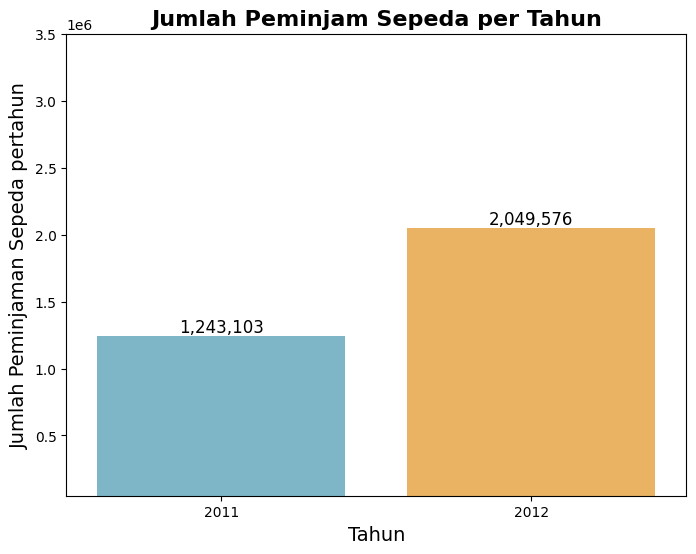

In [214]:
plt.figure(figsize=(8, 6))
colors = ['#72BCD4', '#FFB74D']

bar=sns.barplot(
    x='yr',
    y='cnt',
    data=group_df, palette=colors)

for p in bar.patches:
    bar.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)
plt.title('Jumlah Peminjam Sepeda per Tahun', fontsize=16, fontweight= 'bold')
plt.xlabel('Tahun', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['2011', '2012'])
plt.ylabel('Jumlah Peminjaman Sepeda pertahun', fontsize=14)
plt.ylim(50000,3500000)
plt.show()


In [215]:

# # #2011
by_2011 = dt_day[dt_day['yr'] == 2011]
hasil1=by_2011.groupby(by="dteday")['cnt'].sum()
sorted_hasil1 = hasil1.sort_values(ascending=False)
sort1 = sorted_hasil1.head(1)  #dihasilkan pada tanggal 2011-07-04 dengan jumlah 6043 (2011-07-04)
print("Lonjakan Tertinggi 2011:\n", sort1)

# #2012
by_2012 = dt_day[dt_day['yr'] == 2012]
hasil2=by_2012.groupby(by="dteday")['cnt'].sum()
sorted_hasil2 = hasil2.sort_values(ascending=False)
sort2 = sorted_hasil2.head(1) #dihasilkan pada tanggal 2011-07-04 dengan jumlah 8714 (2012-09-15)
print("Lonjakan Tertinggi 2012:\n", sort2)




Lonjakan Tertinggi 2011:
 dteday
2011-07-04    6043
Name: cnt, dtype: int64
Lonjakan Tertinggi 2012:
 dteday
2012-09-15    8714
Name: cnt, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18556\709459532.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_df = grouped_by_year.apply(lambda x: x.loc[x['cnt'].idxmax()])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18556\709459532.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.barplot(


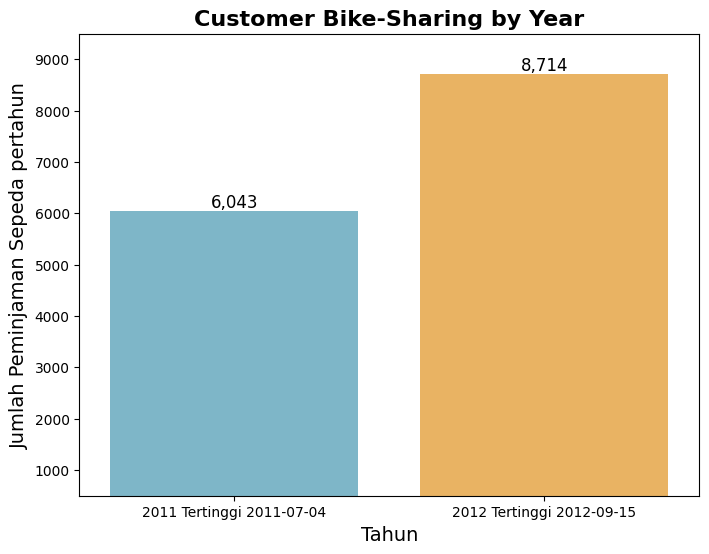

In [216]:

# Plot untuk data peminjam paling tinggi pertahun
grouped_by_year = dt_day.groupby('yr')
group_df = grouped_by_year.apply(lambda x: x.loc[x['cnt'].idxmax()])
hasil = group_df[['yr', 'cnt']]
hasil

plt.figure(figsize=(8, 6))
colors = ['#72BCD4', '#FFB74D']

bar=sns.barplot(
    x='yr',
    y='cnt',
    data=hasil, palette=colors)

for p in bar.patches:
    bar.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)
plt.title('Customer Bike-Sharing by Year', fontsize=16, fontweight= 'bold')
plt.xlabel('Tahun', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['2011 Tertinggi 2011-07-04', '2012 Tertinggi 2012-09-15'])
plt.ylabel('Jumlah peminjam harian paling tinggi pertahun', fontsize=14)
plt.ylim(500,9500)
plt.show()


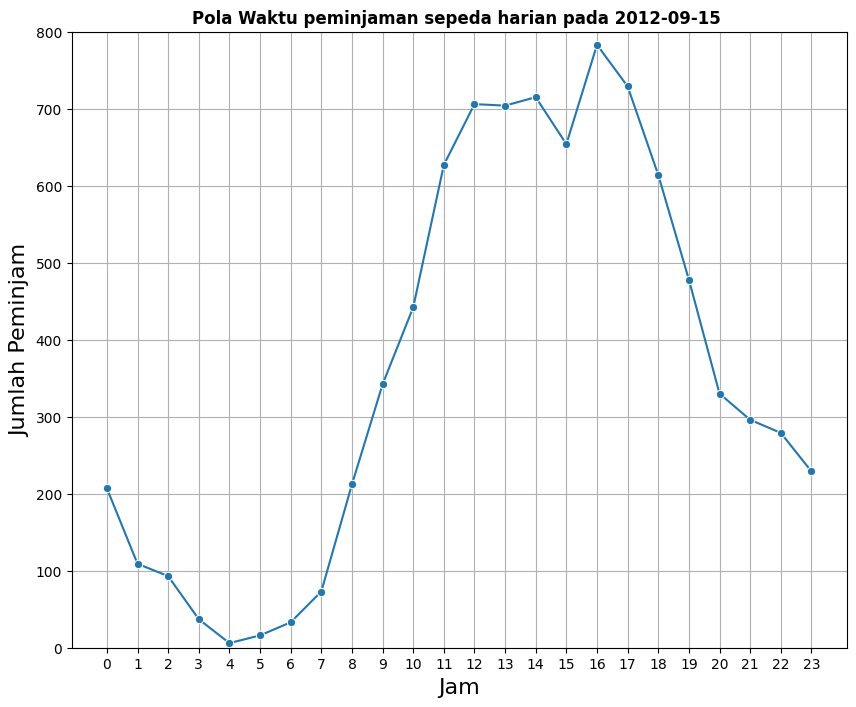

In [228]:
hari =dt_hour[dt_hour['dteday'] == '2012-09-15']
jam = hari['hr']
jumlah = hari['cnt']


plt.figure(figsize=(10, 8))
sns.lineplot(data=hari, x='hr', y='cnt', marker='o')
plt.title ("Pola Waktu peminjaman sepeda harian pada 2012-09-15 ",fontsize=12, fontweight='bold')
plt.ylabel ("Jumlah Peminjam", fontsize=16)
plt.ylim(0,800)
plt.xlabel ("Jam",fontsize=16)
plt.xticks(jam)
plt.grid(True)
plt.show()


### Pertanyaan 2:

   weathersit         cnt
0           1  253.661581
1           2  212.997850
2           3  142.376176
3           4   93.500000
   holiday         cnt
0        0  236.181164
1        1  185.490421
   workingday         cnt
0           0  220.658273
1           1  241.206920


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18556\733314021.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x='weathersit', y='cnt', data=weather, palette='viridis')


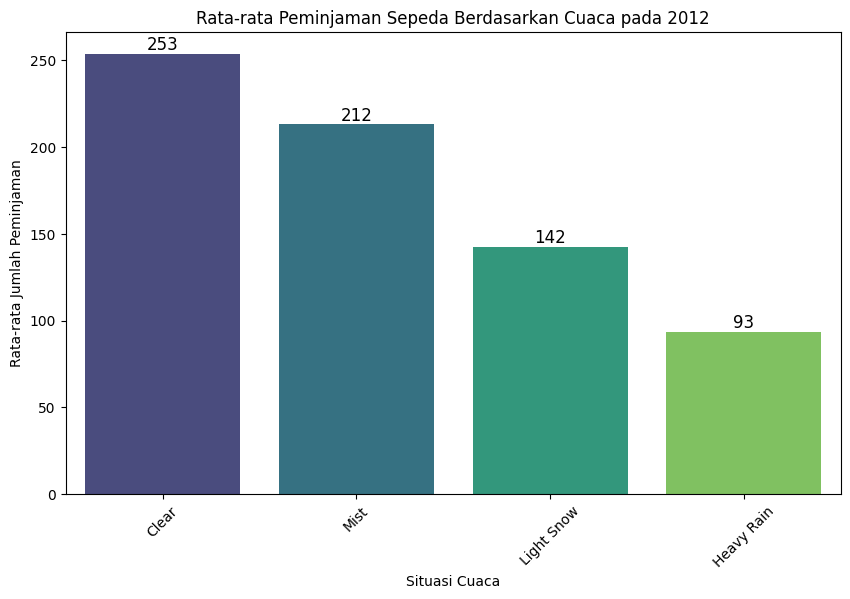

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18556\733314021.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x='holiday', y='cnt', data=holiday, palette='viridis')


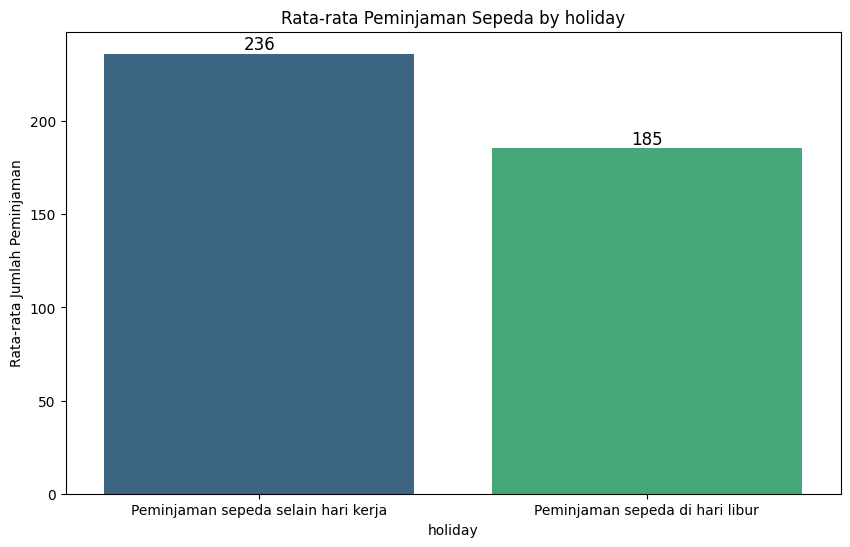

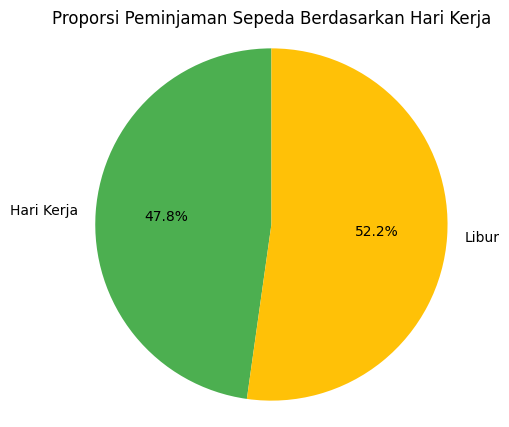

<Figure size 640x480 with 0 Axes>

In [218]:
by2012 = dt_hour[dt_hour['yr'] == 2012]
by2012

weather= by2012.groupby('weathersit')['cnt'].mean().reset_index()
print(weather)

holiday = by2012.groupby('holiday')['cnt'].mean().reset_index()
print(holiday)

work = by2012.groupby('workingday')['cnt'].mean().reset_index()
print(work)

plt.figure(figsize=(10, 6))
bar1 = sns.barplot(x='weathersit', y='cnt', data=weather, palette='viridis')
for a in bar1.patches:
    bar1.annotate(f'{int(a.get_height()):,}',  
                  (a.get_x() + a.get_width() / 2., a.get_height()),  
                  ha='center', va='bottom', fontsize=12) 
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Cuaca pada 2012')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2,3], labels=['Clear', 'Mist', 'Light Snow','Heavy Rain'], rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
bar2 = sns.barplot(x='holiday', y='cnt', data=holiday, palette='viridis')
for b in bar2.patches:
    bar2.annotate(f'{int(b.get_height()):,}',  
                  (b.get_x() + b.get_width() / 2., b.get_height()),  
                  ha='center', va='bottom', fontsize=12)
plt.title('Rata-rata Peminjaman Sepeda by holiday')
plt.xticks(ticks=[0, 1], labels=['Peminjaman sepeda selain hari kerja','Peminjaman sepeda di hari libur'], rotation=0)
plt.ylabel('Rata-rata Jumlah Peminjaman')


total = work.set_index('workingday')['cnt']
plt.figure(figsize=(5, 5))
plt.pie(total, labels=['Hari Kerja', 'Libur'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title('Proporsi Peminjaman Sepeda Berdasarkan Hari Kerja')
plt.axis('equal')  # Menjaga proporsi lingkaran
plt.show()

plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1 : Saya melakukan group data menggunakan (groupby) untuk mengetahui jumlah peminjam pertahunnya, jumlah peminjam pada 2011=1243103 dan 2012=2049576. Kemudian pembuatan bar plot untuk visualisasi data pertahun. Setelah melakukan penjumlahan peminjam pertahun saya mencari lonjakan paling tinggi pertahun dengan melakukan group data antara koolom tanggal dan jumlah pertahun kemudian short value descending untuk mengathui paling peminjam paling tinggi. Diketahui pelonjakan paling tinggi di 2011 terjadi pada tanggal 2011-07-04 dengan jumlah peminjam 6043, sedangkan pada 2012 terjadi lonjakan pada tanggal 2012-09-15 dengan jumlah peminjam 8714. Setelah mengathui lonjakan paling tinggi pertahun dan paling tinggi pada 2012-09-15, saya melakukan identifikasi pola peminjaman melalui data Waktu peminjam pada tanggal 2012-09-15 yang dimulai pukul 0-23 dengan melakukan group data tanggal,waktu,dan jumlah. Diketahui peminjaman paling tinggi pada pukul 16 dengan jumlah 783 peminjam.

- Pertanyaan 2 : Untuk mengidentifikasi cuaca dan status hari apakah memempengaruhi peminjaman  2012. saya melakukan grup data terlebih dahulu khusus data 2012 saja. Kemudian melakukan grup juga berdasarkan cuaca, status hari kerja/libur untuk mengetahui rata-rata peminjam pada fakor tersebut. Menurut predksi cuaca rata-rata peminjaman paling tinggi terjadi pada saat cuaca cerah dengan jumlah peminjam 253, kemudian pada saat cuaca berawan berjumlah 212 peminjam,pada saat cuaca bersalju rata-rata peminjam 142 orang, sedangkan pada saat cuaca hujan rata-rata peminjam menurun menjadi 93 orang. Kemudian peminjaman pada saat selain hari kerja rata-rata peminjam lebih tinggi daripada pada saat hari biasa


In [230]:
dt_hour.to_csv('dt_hour.csv',index=False)

In [231]:
dt_day.to_csv('dt_day.csv',index=False)

## Analisis Lanjutan (Opsional)

In [227]:
monthly_data = dt_hour.groupby(by='season')[['casual', 'registered','cnt']].sum().reset_index()
monthly_data


,season,casual,registered,cnt
0,Musim Dingin,129782,711831,841613
1,Musim Gugur,226091,835038,1061129
2,Musim Panas,203522,715067,918589
3,Musim Semi,60622,410726,471348


Rata rata peminjam melakukan peminjaman sepeda harian pada saat musim gugur

## Conclusion

Dari hasil analisi : Peminjaman sepeda ini merupakan sistem berbagi sepeda dengan waktu harian yang dapat dipantau melalui sebuah sistem tertentu. Pada tahun 2012 mengalami pelonjakan peminjam yang mencapai 2049576 peminjaman dengan 2 kategori peminjam yaitu register dan casual. Faktor faktor eksternal mempengaruhi minat untuk meminjam dan juga kategori harian. Peminatan peminjaman sepeda meningkat pada saat hari-hari kerja dan jam strategis kerja. Banyak sekali peminjam harian dilakukan pada saat hari kerja. Pada 2012 pelonjakan paling tinggi terjadi pada tanggal 15 september, peminjaman mencapai  8714 orang.

Terdapat pola yang menunjukkan bahwa peminjam sepeda yang paling banyak dilakukan pada saat musim gugur (menggunakan data seperti musim gugur adalah musim dingin, sangat panas, dan hujan) karena sebagian besar orang menggunakan sepeda di waktu yang sering digunakan di musim gugur. Kemudian juga terjadi pelonjaka pada saat hari kerja, kemungkinan besar orang meminjam sepeda pada saat hari kerja sebagai akomodasi berangkat.